In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21'
folder = r'Radiographs\resolution_piece_40kVp_analyzed'
subfolders = ['large', 'middle', 'small_1']

contrast_vals = np.zeros(3)
air_std = np.zeros(3)
plastic_std = np.zeros(3)

std_vals = np.zeros(6)

for i, sf in enumerate(subfolders):
    c_vals = np.load(os.path.join(directory, folder, sf, 'mtf_contrast_vals.npz'), allow_pickle=True)['arr_0']
    c_vals = c_vals.item()
    contrast_vals[i] = c_vals['contrast']
    plastic_std[i] = c_vals['std_1']
    air_std[i] = c_vals['std_2']
    std_vals[2*i:2*i+2] = np.load(os.path.join(directory, folder, sf, 'mtf_pattern_std.npy'))

contrast_vals = np.mean(contrast_vals)
air_std = np.mean(air_std)
plastic_std = np.mean(plastic_std)

In [67]:
bar_size = np.array([1, 0.75, 0.66, 0.5, 0.33, 0.25])  # [mm] spot sizes for CT resolution phantom

# calculate the frequency in line pairs per mm or use the known freq
freq = 1 / (2 * bar_size)

# M' is the measured noise (STD) in each of the bar patterns, uncorrected
M_prime = std_vals

# squared noise using ROIs of air and plastic
# N^2 = (Np^2+Nw^2)/2
noise_2 = (air_std ** 2 + plastic_std ** 2) / 2
# correct std of bar patterns for noise using the water ROI, M = sqrt(M'^2-N^2)
M = []
for std in M_prime:
    if std ** 2 > noise_2:
        M.append(np.sqrt(std ** 2 - noise_2))
    else:
        M.append(0)

# M = np.array([np.sqrt(std_16**2-noise_2),np.sqrt(std_13**2-noise_2),np.sqrt(std_10**2-noise_2),
#             np.sqrt(std_08**2-noise_2),np.sqrt(std_06**2-noise_2),np.sqrt(std_05**2-noise_2)])

# M0 = (CT1-CT2)/2: |Air - Plastic|/2
M0 = contrast_vals / 2

# MTF = (pi*sqrt(2)/4)*(M/M0)
MTF = (np.pi * np.sqrt(2) / 4) * (M / M0)

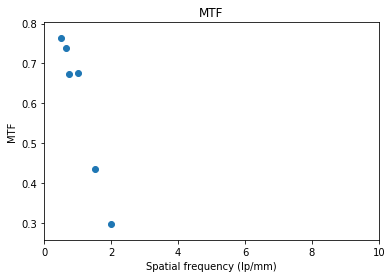

In [68]:
fig = plt.figure()
plt.scatter(freq, MTF)
plt.title("MTF")
plt.ylabel("MTF")
plt.xlabel("Spatial frequency (lp/mm)")
plt.xlim([0, 10])
plt.show()

# Save the MTF
np.save(os.path.join(directory, folder, 'mtf.npy'), np.array([freq, MTF]))


In [69]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21\Radiographs'
folder = r'Stationary_MV_analyzed\phantom_scan'

c_vals = np.load(os.path.join(directory, folder, 'mtf_contrast_vals.npz'), allow_pickle=True)['arr_0']
c_vals = c_vals.item()

contrast_vals = c_vals['contrast']
plastic_std = c_vals['std_1']
air_std = c_vals['std_2']
std_vals = np.load(os.path.join(directory, folder, 'mtf_pattern_std.npy'))

In [70]:
freq = [0.2, 0.25, 0.45, 0.76]  # MV PipsPro

# M' is the measured noise (STD) in each of the bar patterns, uncorrected
M_prime = std_vals

# squared noise using ROIs of air and plastic
# N^2 = (Np^2+Nw^2)/2
noise_2 = (air_std ** 2 + plastic_std ** 2) / 2
# correct std of bar patterns for noise using the water ROI, M = sqrt(M'^2-N^2)
M = []
for std in M_prime:
    if std ** 2 > noise_2:
        M.append(np.sqrt(std ** 2 - noise_2))
    else:
        M.append(0)

# M = np.array([np.sqrt(std_16**2-noise_2),np.sqrt(std_13**2-noise_2),np.sqrt(std_10**2-noise_2),
#             np.sqrt(std_08**2-noise_2),np.sqrt(std_06**2-noise_2),np.sqrt(std_05**2-noise_2)])

# M0 = (CT1-CT2)/2: |Air - Plastic|/2
M0 = contrast_vals / 2

# MTF = (pi*sqrt(2)/4)*(M/M0)
MTF = (np.pi * np.sqrt(2) / 4) * (M / M0)

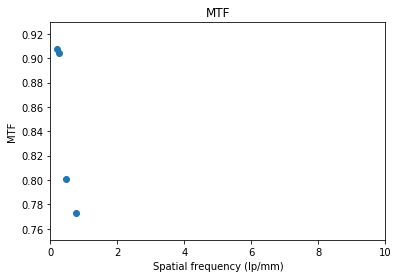

In [71]:
fig = plt.figure()
plt.scatter(freq, MTF)
plt.title("MTF")
plt.ylabel("MTF")
plt.xlabel("Spatial frequency (lp/mm)")
plt.xlim([0, 10])
plt.show()

# Save the MTF
np.save(os.path.join(directory, folder, 'mtf.npy'), np.array([freq, MTF]))


In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21\Radiographs'
folder = r'Stationary_kV_analyzed\phantom_scan'

c_vals = np.load(os.path.join(directory, folder, 'mtf_contrast_vals.npz'), allow_pickle=True)['arr_0']
c_vals = c_vals.item()

contrast_vals = c_vals['contrast']
plastic_std = c_vals['std_1']
air_std = c_vals['std_2']
std_vals = np.load(os.path.join(directory, folder, 'mtf_pattern_std.npy'))

In [73]:
freq = [0.66, 0.98, 1.50]  # kV PipsPro

# M' is the measured noise (STD) in each of the bar patterns, uncorrected
M_prime = std_vals

# squared noise using ROIs of air and plastic
# N^2 = (Np^2+Nw^2)/2
noise_2 = (air_std ** 2 + plastic_std ** 2) / 2
# correct std of bar patterns for noise using the water ROI, M = sqrt(M'^2-N^2)
M = []
for std in M_prime:
    if std ** 2 > noise_2:
        M.append(np.sqrt(std ** 2 - noise_2))
    else:
        M.append(0)

# M = np.array([np.sqrt(std_16**2-noise_2),np.sqrt(std_13**2-noise_2),np.sqrt(std_10**2-noise_2),
#             np.sqrt(std_08**2-noise_2),np.sqrt(std_06**2-noise_2),np.sqrt(std_05**2-noise_2)])

# M0 = (CT1-CT2)/2: |Air - Plastic|/2
M0 = contrast_vals / 2

# MTF = (pi*sqrt(2)/4)*(M/M0)
MTF = (np.pi * np.sqrt(2) / 4) * (M / M0)

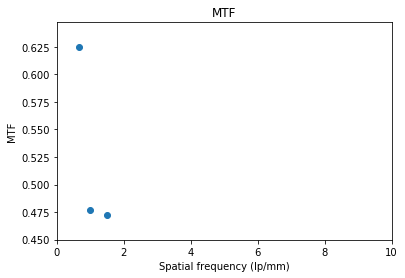

In [74]:
fig = plt.figure()
plt.scatter(freq, MTF)
plt.title("MTF")
plt.ylabel("MTF")
plt.xlabel("Spatial frequency (lp/mm)")
plt.xlim([0, 10])
plt.show()

# Save the MTF
np.save(os.path.join(directory, folder, 'mtf.npy'), np.array([freq, MTF]))